# Visualize CO2 Time Series with Python

Nowadays, when people talk about the rise of our planet's average surface temperature, they will inevitably mention carbon dioxide and other Greenhouse Gases (GHGs). We can easily check the latest CO2 data using Python. CO2 data can be downloaded from [esrl](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html), covering the period from Mar/1958 to Apr/2018. CO2 expressed as a mole fraction in dry air, micromol/mol, abbreviated as ppm. 

The data are a typical time series data, which are one of the most common data types. One powerful yet simple method for analyzing and predicting periodic data is the additive model. The idea is straightforward: represent a time-series as a combination of patterns at different scales such as daily, weekly, seasonally, and yearly, along with an overall trend.

In this notebook, we will introduce some common techniques used in time-series analysis and walk through the iterative steps required to manipulate, visualize time-series data.

## 1. Load all needed libraries

In [11]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden
import matplotlib
# Plot size to 12" x 7"
matplotlib.rc('figure', figsize = (12, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

matplotlib inline


## 2. Read CO2 time series data

### 2.1 Load data

In [2]:
co2 = pd.read_csv('data\co2_mm_mlo.txt', 
                  skiprows=72,
                  header=None, 
                  comment = "#", 
                  delim_whitespace = True, 
                  names = ["year", "month", "decimal_date", "average", "interpolated", "trend", "days"],
                  na_values =[-99.99, -1])

co2['Date'] = co2['year']*100 + co2['month']
co2['Date'] = pd.to_datetime(co2['Date'], format='%Y%m', errors='ignore')
co2.set_index('Date', inplace=True)

### 2.2 Drop other columns, only keep the original data

In [3]:
co2.drop(["year", "month", "decimal_date", "interpolated",  "trend", "days"], axis=1, inplace=True)

In [4]:
co2.head()

,average
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,NaN
1958-07-01,315.86


### 2.3 Handle missing values

Real world data tends to be messy. Data can have missing values for a number of reasons such as observations that were not recorded and data corruption. Handling missing data is important as many data analysis algorithms do not support data with missing values.

The simplest way is using the command of **isnull** to reveal missing data.

In [5]:
co2.isnull().sum()

average    7
dtype: int64

There are 7 months with missing values in our time series.

The simplest strategy for handling missing data is to drop those records that contain a missing value. Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. The syntax of drop rows with missing values looks like: dataset.dropna(inplace=True).

However, we should "fill in" missing values if they are not too numerous so that we don’t have gaps in the data. This can be done using the fillna() command in pandas. The filling methods consist of
* backfill
* bfill
* pad
* ffill
* None (default)

For simplicity, missing values are filled with the closest non-null value in CO2 time series, although it is important to note that a rolling mean would sometimes be preferable.

In [6]:
co2 = co2.fillna(co2.bfill())

Now the number of missing values should be 0.

In [7]:
co2.isnull().sum()

average    0
dtype: int64

## 3. Visualizing CO2 Time-series Data

### 3.1 Start with a quick plot

It is very easy to use Pandas to plot the co2 time series. Moreover, deeper analysis always starts with the  first view of data.

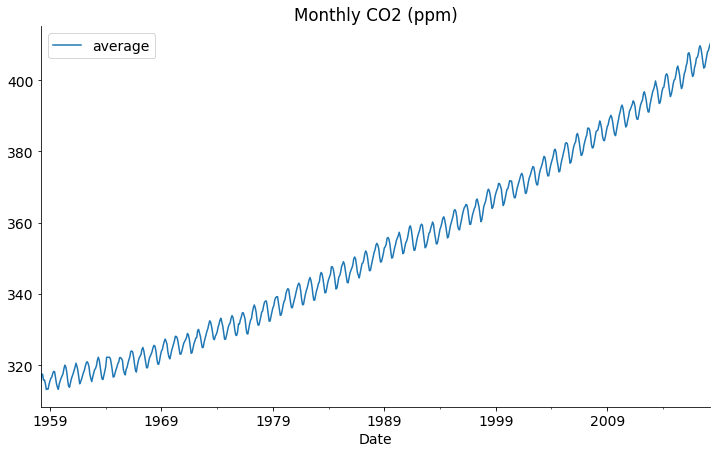

In [8]:
co2.plot(title='Monthly CO2 (ppm)')

From the above image, we can find that there may be a linear trend, but it is hard to be sure from eye-balling. Moreover, it has an obvious seasonality pattern, but the amplitude (height) of the cycles appears to be stable, suggesting that it should be suitable for an additive model.

We can also visualize our data using a method called time-series decomposition. As its name suggests, time series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

### 3.2 Decompose time-series

Seasonal_decompose function provided by statsmodels is applied to perform seasonal decomposition of the CO2 data.

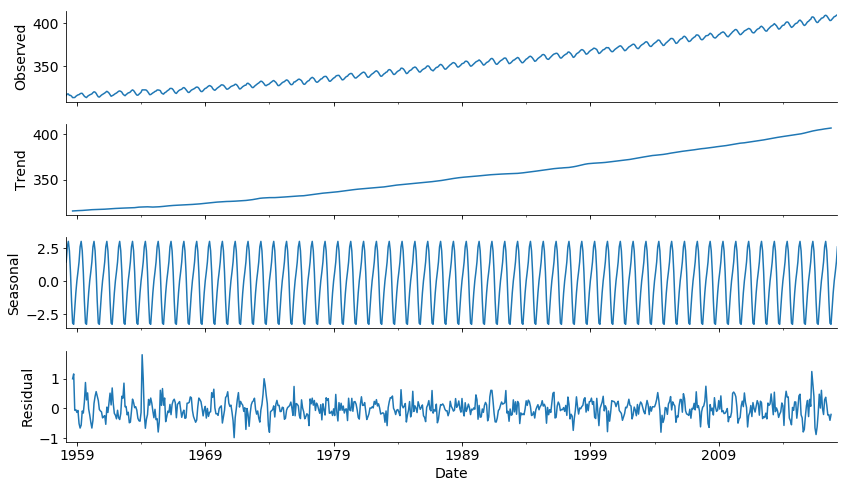

In [9]:
decomposition = sm.tsa.seasonal_decompose(co2, model='additive')
fig = decomposition.plot()

Each component of decomposition is accessible via:

* decomposition.resid
* decomposition.seasonal
* decomposition.trend

For example, we can check the trend in 1991.

In [10]:
decomposition.trend['1991']

,average
Date,
1991-01-01,355.214583
1991-02-01,355.305833
1991-03-01,355.380000
1991-04-01,355.449583
1991-05-01,355.510833
1991-06-01,355.574583
1991-07-01,355.666250
1991-08-01,355.782500
1991-09-01,355.866250


## Summary
The plot above clearly shows an upward trend of the monthly CO2, along with a stable seasonality using time-series decomposition. 

## References

Seabold, Skipper, and Josef Perktold. “Statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.

Data Structures for Statistical Computing in Python; presented at SciPy 2010

pandas: a Foundational Python Library for Data Analysis and Statistics; presented at PyHPC2011

http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

https://climatedataguide.ucar.edu/climate-data-tools-and-analysis/trend-analysis